# Tutorial de Big Data (UdeSA) 2025
## Tutorial 2 - Parte 2

El objetivo es graficar con matplotlib.

Matplotlib es la librería base de graficación, sobre la cual se montan otras librerías. Dentro de Matplotlib, usamos la dependencia "pyplot" que se instala con la librería. Por convención importamos así:

In [1]:
#!pip install matplotlib
import matplotlib.pyplot as plt # importamos la librería gráfica. plt es el nombre por convención que se le asigna

Matplotlib genera los gráficos sobre dos objetos interrelacionados:
- **Figure**: la hoja en blanco, el recuadro que contiene hacia adentro el/los gráfico/s. En términos prácticos esto ocurre detrás de escenas, pero es lo que permite dibujar el gráfico.
- **Axes**: el gráfico en sí, los ejes y la informacíon graficada. La representación de la información sobre ejes.

Las partes de un gráfico
<img src="https://matplotlib.org/stable/_images/anatomy.png"
     width=500/>

Hay esencialmente dos maneras de graficar con Matplotlib:
- **Estilo pyplot**: simple y rápida para figuras que no son muy avanzadas. Quizás más fácil para empezar.
- **Estilo orientado-objetos**: un poco más complejo pero necesario para figuras que requieren mucha personalización.

En cuanto al resultado estético, con ambos se puede lograr la misma calidad. Para dar los primeros pasos es indistinto cual se use. Sin embargo, el estilo orientado a objetos es necesario para figuras más complejas donde hay varios gráficos (subplots) y es necesario definir parámetros distintos para cada par de ejes (2D)

### Graficar con matplotlib

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import os
os.chdir("/Users/tomaspacheco/Documents/GitHub/BigDataUdeSA/Tutorial_2/")

In [7]:
# Abrimos el archivo de potencia energética instalada en el país
df = pd.read_excel("potencia_instalada.xlsx")

In [ ]:
 # exploren aqui la base. Hint: tail, head, sample, info...


In [9]:
# Agregamos (collapse) a nivel de tipo de fuente
df_fuente = df.groupby(by=["periodo","fuente_generacion"]).agg({"potencia_instalada_mw":"sum"})
df_fuente.reset_index(inplace=True)
df_fuente.sample(5)

,periodo,fuente_generacion,potencia_instalada_mw
6,2015-11-01,Renovable,212.800
139,2018-08-01,Térmica,24448.059
96,2017-10-01,Hidráulica,11101.380
56,2016-12-01,Hidráulica,10681.700
68,2017-03-01,Hidráulica,11106.700


In [ ]:
df_fuente.shape

Vamos a graficar dos líneas, así que definimos vector X e Y para cada una. Vamos a graficar la potencia instalada de generación por fuente Renovable y fuente Térmica:

In [ ]:
# Definimos  vectores  de datos  para  serie 1 (renovable)
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# Definimos  vectores  de datos  para  serie 2 (térmica)
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

# Nota: df[condicion][columna] selecciona la "columna" de la base que resulta de aplicar el filtro df[condicion].

In [ ]:
# Creamos el gráfico al estilo pyplot

plt.plot(x1, y1, label="Renovable") # serie 1
plt.plot(x2, y2, label="Térmica") # serie 2
# Estas  dos  líneas  estaran  sobre  el mismo  gráfico

# Modifico  labels
plt.xlabel("Período")
plt.ylabel("Potencia  Instalada (MW)")
plt.title("Producción Energética Argentina según Fuente")

# Agrego  leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

In [ ]:
# Creamos el gráfico al estilo OO (orientado-objetos)

# Creamos la figura y los axes
fig, ax = plt.subplots() # crear objetos

# Definimos series
ax.plot(x1, y1, label="Renovable") # Serie 1
ax.plot(x2, y2, label="Térmica") # Serie 2

# Modificamos labels y título
ax.set_xlabel("Período")
ax.set_ylabel("Potencia  Instalada (MW)")
ax.set_title("Producción Energética Argentina según Fuente (v2)")

# Agregamos leyenda
ax.legend()
fig.show()

In [ ]:
# Graficar múltiples gráficos estilo pyplot

# ejemplo 2 ax en un fig
plt.figure(figsize=(14, 5))

# Definimos primer gráfico
plt.subplot(121) # subplot(nrows, ncols, index, **kwargs) donde nrows=1, ncols=2, index=1
plt.plot(x1, y1)
plt.title("A. Fuente Renovable")

# Definimos segundo gráfico
plt.subplot(122)
plt.plot(x2, y2)
plt.title("B. Fuente Térmica")

# Definimos título general de la figura
plt.suptitle("Ejemplo dos gráficos en una figura")
plt.show()

In [ ]:
# Graficar múltiples gráficos estilo O-O

# ejemplo 2 ax en un fig
fig, ax = plt.subplots(figsize=(14, 5), ncols=2, nrows=1)

# Definimos primer gráfico
ax[0].plot(x1, y1)
ax[0].set_title("Fuente Renovable")

# Definimos segundo gráfico
ax[1].plot(x2, y2)
ax[1].set_title("Fuente Térmica")

# Definimos título general de la figura
fig.suptitle("Ejemplo dos gráficos en una figura")
fig.show()

Comentario: un gráfico orientado a objetos (O-O) en Matplotlib se refiere al uso explícito de los objetos Figure y Axes para crear y controlar un gráfico. Esto contrasta con el enfoque stateful (pyplot), que modifica el estado global de la visualización.


### Gráficos con ipywidgets

Los widgets en Python son objetos que tienen una representación en el navegador. Por ejemplo, los widgets pueden tener forma de una caja de texto, un desplegable, una casilla de verificación, etc.
Más info sobre ipywidgets [acá](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html)

In [11]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import datetime

In [27]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [13]:
lista_fuentes = list(set(df_fuente['fuente_generacion']))
lista_fuentes

['Térmica', 'Hidráulica', 'Renovable', 'Nuclear']

In [17]:
# Seleccionar tipo de fuente
print("Seleccionar Fuente:")
fuente = widgets.Dropdown(
    options=['Nuclear','Renovable',  'Hidráulica', 'Térmica'],
    value='Nuclear', # "Nuclear" es la opción seleccionada de forma predeterminada cuando se crea el widget
    description='Fuente:',
    disabled=False # widget activo. si disabled=True, el widget se vuelve inactivo y el usuario no puede interactuar con él.
)
display(fuente) # Muestra el widget

Seleccionar Fuente:


Dropdown(description='Fuente:', options=('Nuclear', 'Renovable', 'Hidráulica', 'Térmica'), value='Nuclear')

In [19]:
fechas = list(set(df_fuente['periodo'].dt.strftime("%y-%m"))) 
# set para eliminar duplicados
# strftime() para formatear la fechas en un string según un formato deseado. 
# "%y-%m" formato tal que se muestren los últimos dos dígitos del año (%y) seguidos por el mes (%m).
fechas.sort()
fechas

['15-10',
 '15-11',
 '15-12',
 '16-01',
 '16-02',
 '16-03',
 '16-04',
 '16-05',
 '16-06',
 '16-07',
 '16-08',
 '16-09',
 '16-10',
 '16-11',
 '16-12',
 '17-01',
 '17-02',
 '17-03',
 '17-04',
 '17-05',
 '17-06',
 '17-07',
 '17-08',
 '17-09',
 '17-10',
 '17-11',
 '17-12',
 '18-01',
 '18-02',
 '18-03',
 '18-04',
 '18-05',
 '18-06',
 '18-07',
 '18-08',
 '18-09',
 '19-01',
 '19-04']

In [21]:
select_fecha = widgets.SelectionRangeSlider(
    options=fechas,
    index=(0, len(fechas)-1),
    description='Fechas',
    disabled=False
)
display(select_fecha)

SelectionRangeSlider(description='Fechas', index=(0, 37), options=('15-10', '15-11', '15-12', '16-01', '16-02'…

In [23]:
# Probamos si los valores quedaron actualizados
# Para usar los valores definidos usamos .value

print("El rango de fechas a usar es: ", select_fecha.value)
print("La fuente a mostrar es: ", fuente.value)

El rango de fechas a usar es:  ('16-09', '18-02')
La fuente a mostrar es:  Hidráulica


Evolución de la potencia instalada de fuente: Hidráulica


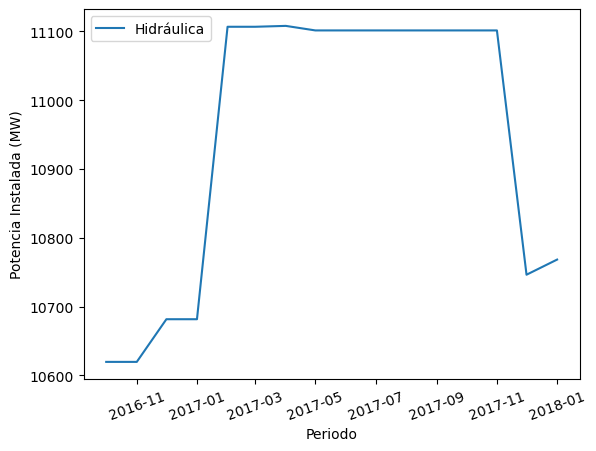

In [25]:
# Creamos un dataframe con la selección de filas de la fuente elegida
df_temp =  df_fuente[df_fuente['fuente_generacion'] == fuente.value]

# Extraemos el objeto fecha del string creado a partir del widget
fecha_min = datetime.datetime.strptime(select_fecha.value[0], "%y-%m") 
fecha_max = datetime.datetime.strptime(select_fecha.value[1], "%y-%m")
# con el módulo datetime y su función strptime creamos un objeto datetime (que contiene info de date y time)

# Filtramos según fechas elegidas
df_temp = df_temp[(df_temp['periodo']>fecha_min)&(df_temp['periodo']<fecha_max)]

print("Evolución de la potencia instalada de fuente: {}".format(fuente.value))
# Creamos el grafico
plt.plot(df_temp['periodo'], df_temp['potencia_instalada_mw'], label=fuente.value) 
# Modificamos labels
plt.xlabel('Periodo')
plt.xticks(rotation=20)
plt.ylabel('Potencia Instalada (MW)')

# Agregamos leyenda
plt.legend()
plt.show()